# 서포트 벡터 머신

### 선형 분류기 훈련하기

In [1]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

svc = LinearSVC(C=1.0)

model = svc.fit(features_standardized,target)

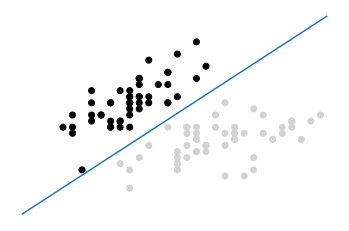

In [2]:
from matplotlib import pyplot as plt

color = ['black' if c==0 else 'lightgrey' for c in target]
plt.scatter(features_standardized[:,0],features_standardized[:,1],c=color)

w = svc.coef_[0]
a = -w[0]/ w[1]
xx = np.linspace(-2.5,2.5)
yy =  a * xx - (svc.intercept_[0]) / w[1]

plt.plot(xx,yy)
plt.axis('off'), plt.show();

In [3]:
new_observation = [[-2,3]]
svc.predict(new_observation)

array([0])

In [4]:
svc.decision_function(new_observation)

array([-6.84223927])

### 커널을 사용해 선형적으로 구분되지 않는 클래스

In [5]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

np.random.seed(0)

features = np. random.randn(200,2)

target_xor = np.logical_xor(features[:,0]>0,features[:,1] > 0 )
target = np.where(target_xor,0,1)

svc = SVC(kernel = 'rbf', random_state = 0, gamma = 1, C= 1)

model = svc.fit(features,target)

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier):
    cmap = ListedColormap(('red','blue'))
    xx1,xx2 = np.meshgrid(np.arange(-3,3,0.02), np.arange(-3,3,0.02))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha = 0.1,cmap = cmap)
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl,0], y = X[y==cl,1],alpha = 0.8,c = cmap.colors[idx],marker = "+",label = cl)

In [8]:
svc_linear = SVC(kernel = 'linear',random_state = 0 , C = 1)

svc_linear.fit(features,target)

SVC(C=1, kernel='linear', random_state=0)

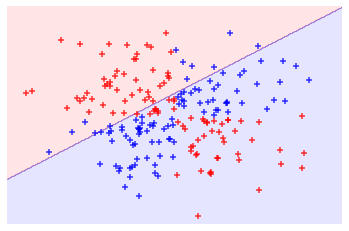

In [9]:
plot_decision_regions(features,target,classifier = svc_linear)
plt.axis('off'), plt.show();

In [10]:
svc = SVC(kernel = 'rbf',random_state = 0, gamma = 1, C =1)

model =svc.fit(features,target)

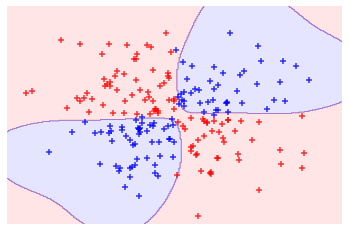

In [11]:
plot_decision_regions(features,target,classifier = svc)
plt.axis('off'), plt.show();

### 예측 확률 확인하기

In [12]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
features = iris.data
target = iris.target

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

svc = SVC(kernel = 'linear',random_state = 0)

model = svc.fit(features_standardized,target)

model.support_vectors_

array([[-0.90068117,  0.55861082, -1.16971425, -0.92054774],
       [-1.62768839, -1.74335684, -1.39706395, -1.18381211],
       [ 1.2803405 ,  0.09821729,  0.64908342,  0.3957741 ],
       [ 0.79566902, -0.59237301,  0.47857113,  0.3957741 ],
       [ 0.55333328,  0.55861082,  0.53540856,  0.52740629],
       [-1.14301691, -1.51316008, -0.26031542, -0.26238682],
       [-0.29484182, -0.13197948,  0.42173371,  0.3957741 ],
       [ 0.4321654 , -1.97355361,  0.42173371,  0.3957741 ],
       [ 0.06866179,  0.32841405,  0.59224599,  0.79067065],
       [ 0.55333328, -1.28296331,  0.64908342,  0.3957741 ],
       [ 1.15917263, -0.59237301,  0.59224599,  0.26414192],
       [ 1.03800476, -0.13197948,  0.70592084,  0.65903847],
       [ 0.18982966, -0.36217625,  0.42173371,  0.3957741 ],
       [ 0.18982966, -0.82256978,  0.76275827,  0.52740629],
       [-0.53717756, -0.13197948,  0.42173371,  0.3957741 ],
       [ 0.55333328, -1.74335684,  0.36489628,  0.13250973],
       [-0.90068117, -1.

In [13]:
model.support_

array([ 23,  41,  52,  54,  56,  57,  66,  68,  70,  72,  76,  77,  78,
        83,  84,  87,  98, 106, 110, 119, 123, 126, 127, 129, 133, 134,
       137, 138, 149])

In [14]:
model.n_support_

array([ 2, 15, 12])

### 불균형한 클래스 다루기

In [15]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

features = features[40:,:]
target = target[40:]

target = np.where((target == 0),0,1)

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

svc = SVC(kernel = 'linear',class_weight = 'balanced', C= 1.0, random_state = 0)

model = svc.fit(features_standardized,target)